In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [69]:
train_data = pd.read_csv("train.csv")

In [70]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
train_data.shape

(891, 12)

In [72]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [73]:
print("\nMissing values in the training dataset:\n", train_data.isnull().sum())
print("\nMissing values in the test dataset:\n", test_data.isnull().sum())


Missing values in the training dataset:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in the test dataset:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [74]:
# 1. Data Cleaning: Handling missing values

In [75]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)


In [76]:
train_data.drop(['Cabin'], axis=1, inplace=True)
test_data.drop(['Cabin'], axis=1, inplace=True)

In [77]:
# Let's fill with mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [78]:
print("\nMissing values in the training dataset:\n", train_data.isnull().sum())
print("\nMissing values in the test dataset:\n", test_data.isnull().sum())


Missing values in the training dataset:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Missing values in the test dataset:
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [79]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [80]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


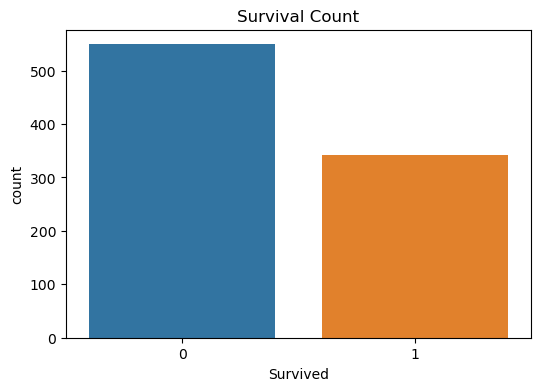

In [81]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Count')
plt.show()

In [82]:
train_data["Pclass"].unique

<bound method Series.unique of 0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64>

C:\Users\16088\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


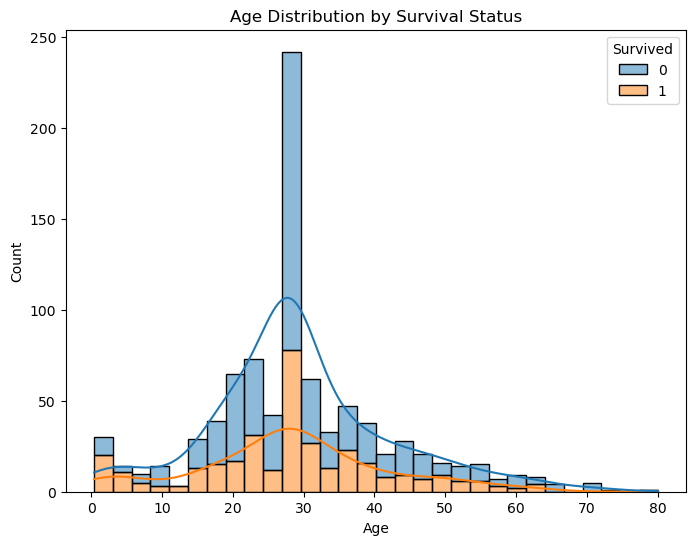

In [83]:
plt.figure(figsize=(8,6))
sns.histplot(data=train_data, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Age Distribution by Survival Status')
plt.show()

# Data Cleaning: Converting categorical variables

In [84]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

In [85]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True


In [86]:
test_data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,True,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,True,True,False
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,True,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,False,False,True


In [87]:
survived_women = train_data[(train_data["Sex_male"] == False) & (train_data["Survived"] == 1)].shape[0] 
total_women = train_data[train_data["Sex_male"] == False].shape[0]
percentage_women_survived = (survived_women / total_women) * 100
print(f"Percentage of women who survived: {percentage_women_survived:.2f}%")

Percentage of women who survived: 74.20%


In [88]:
total_men = train_data[train_data["Sex_male"] == True].shape[0]
survived_men = train_data[(train_data["Sex_male"] == True) & (train_data["Survived"] == 1)].shape[0]
percentage_men_survived = (survived_men / total_men) * 100
print(f"Percentage of men who survived: {percentage_men_survived:.2f}%")

Percentage of men who survived: 18.89%


In [89]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True


In [91]:
X = train_data.drop(['Survived',"Name","Ticket"], axis=1)
y = train_data['Survived']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(), 
    'Naive Bayes': GaussianNB(),       
    'MLP Neural Network': MLPClassifier() 
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

Decision Tree Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       105
           1       0.68      0.69      0.68        74

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179

Random Forest Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82  

C:\Users\16088\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Model Accuracy

In [95]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.80
Decision Tree Accuracy: 0.71
Random Forest Accuracy: 0.82
SVM Accuracy: 0.81
KNN Accuracy: 0.80
Gradient Boosting Accuracy: 0.82
XGBoost Accuracy: 0.79
AdaBoost Accuracy: 0.79
Naive Bayes Accuracy: 0.77
MLP Neural Network Accuracy: 0.81


C:\Users\16088\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Model Comparison

C:\Users\16088\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


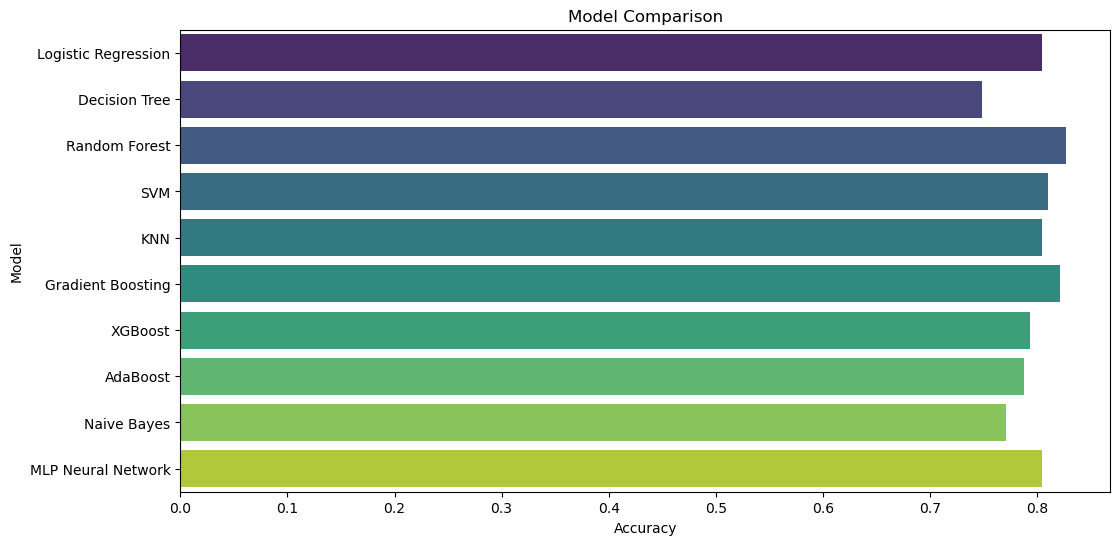

In [96]:
result = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    result.append((name,accuracy))
    
result_df = pd.DataFrame(result, columns=['Model', 'Accuracy'])

# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(x='Accuracy', y='Model', data=result_df, palette='viridis')
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.show()

# Conclusion

In [99]:
"""In this project, we analyzed the Titanic survival dataset to predict whether a passenger would survive based on various features such as their age,
sex, passenger class (Pclass), and other attributes. We performed several steps, including data cleaning, handling missing values, exploratory data
analysis (EDA), and building multiple machine learning models to predict survival.

Data Cleaning and Exploration: We began by handling missing values in the dataset, which mainly included filling missing ages with the median value
and removing the "Cabin" column due to a high proportion of missing data. We also encoded categorical variables such as sex and embarked port to
numerical values for model training. We visualized the survival distribution and the relationship between age and survival status, uncovering that
women had a significantly higher survival rate compared to men.

Survival Rate by Gender:

Women Survival Rate: 74.20%
Men Survival Rate: 18.89%
These results suggest that gender played a crucial role in survival, with women being prioritized during rescue efforts.

Modeling and Predictions: We trained and evaluated a variety of machine learning models, including Logistic Regression, Decision Trees, Random Forest,
Support Vector Machines (SVM), K-Nearest Neighbors (KNN), and several boosting techniques (Gradient Boosting, XGBoost, AdaBoost). Our highest-performing
models were Random Forest and Gradient Boosting, both achieving an accuracy of 82% on the test set. The accuracy of other models ranged between 71%
and 82%, indicating that most models performed reasonably well in predicting survival.

Random Forest and Gradient Boosting were the top performers in terms of accuracy.
Decision Trees and Naive Bayes models had lower accuracy, indicating that more complex ensemble methods or models with hyperparameter tuning may perform
better.
In conclusion, our analysis showed that key factors such as sex, age, and class significantly influenced the likelihood of survival,
and machine learning models can effectively predict survival with reasonable accuracy. Further improvements can be made by fine-tuning models
or using advanced techniques such as hyperparameter optimization.

"""

'In this project, we analyzed the Titanic survival dataset to predict whether a passenger would survive based on various features such as their age,\nsex, passenger class (Pclass), and other attributes. We performed several steps, including data cleaning, handling missing values, exploratory data\nanalysis (EDA), and building multiple machine learning models to predict survival.\n\nData Cleaning and Exploration: We began by handling missing values in the dataset, which mainly included filling missing ages with the median value\nand removing the "Cabin" column due to a high proportion of missing data. We also encoded categorical variables such as sex and embarked port to\nnumerical values for model training. We visualized the survival distribution and the relationship between age and survival status, uncovering that\nwomen had a significantly higher survival rate compared to men.\n\nSurvival Rate by Gender:\n\nWomen Survival Rate: 74.20%\nMen Survival Rate: 18.89%\nThese results suggest